## Import legal packages
<strike>from sklearn.linear_models import LogisticRegressionCV</strike><br>
<strike>import tensorflow as tf</strike>

In [1]:
from tqdm import tqdm
import helpers
import logistic_regression as myLR
import matplotlib.pyplot as plt
import pickle

## The only hyperparameters for this notebook

In [2]:
N_EPOCH = 300
READ_FROM_DISK = True

## Read <font color="green">train</font>, <font color="blue">val</font>, <font color="red">test</font> from disk or build them from the dataset

In [3]:
if READ_FROM_DISK:
    X_train, y_train, X_val, y_val, X_test, y_test = pickle.load(open("data.pkl" , "rb+"))
    id2word, word2id = pickle.load(open("vocab.pkl" , "rb+"))
else:
    # Read, tokenize and split dataset
    (X_train, y_train), (X_val, y_val), (X_test, y_test), (id2word, word2id) = helpers.read_aclImdb("../aclImdb/")
    # Save on disk
    pickle.dump((X_train, y_train, X_val, y_val, X_test, y_test), open("data.pkl" , "wb"))
    pickle.dump((id2word, word2id), open("vocab.pkl" , "wb"))

print("Sizes - train: {0}, val: {1}, test: {2}".format(len(X_train), len(X_val), len(X_test)))
print("Vocabulary of size {0} and TOP-5 popular words: {1}".format(len(id2word), id2word[:5]))

Sizes - train: 20000, val: 5000, test: 25000
Vocabulary of size 2000 and TOP-5 popular words: ['the', 'a', 'and', 'of', 'to']


## Training

In [4]:
scores = {'train': [], 'val': []}
weights = []
model = myLR.LogisticRegression()
for _ in tqdm(range(N_EPOCH)):
    for i, (x, y) in enumerate(helpers.batches(X_train, y_train)):
        model.fit(x, y)
    # Save losses each epoch, min_loss will give the index for the best epoch
    scores['train'].append(model.score(X_train, y_train))
    scores['val'].append(model.score(X_val, y_val))
    # Save weights each epoch to restore the best model
    weights.append((model.W, model.b))

100%|██████████| 300/300 [02:45<00:00,  1.81it/s]


## Plotting

In [5]:
def plot_losses(train, val, filename=None):
    # Plot train, val and guess
    plt.plot(train, label='train', color='blue')
    plt.plot(val, label='val', color='green')
    plt.hlines(1. / 2, colors='r', linewidth=3, xmin=0, xmax=len(train), label='guess')
    # Legend and axis
    plt.xlabel('epoch #')
    plt.ylabel('accuracy')
    plt.legend()
    if filename: plt.savefig(filename) # Save plot if requested
    plt.show()

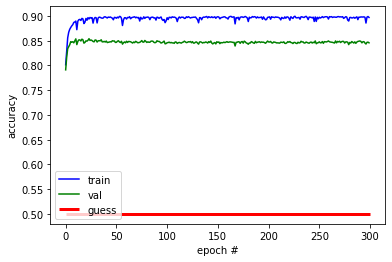

In [6]:
plot_losses(scores['train'], scores['val'], "results.png")

## Estimating test loss of the best model

In [7]:
best_epoch = scores['val'].index(max(scores['val']))
print("Best model achieved at epoch #{0}".format(best_epoch))
model.W, model.b = weights[best_epoch]
print("Test accuracy: {0:.2f}% (random guess is {1:.2f}%).".format(model.score(X_test, y_test) * 100, 1. / 2 * 100))

Best model achieved at epoch #23
Test accuracy: 84.25% (random guess is 50.00%).
